In [1]:
from IPython.display import Image
from IPython.core.display import HTML

Image(url= "https://blog.forumias.com/wp-content/uploads/2018/07/drug-abuse.jpg")

# Agenda

### 1 Introduction to task and leading questions

### 2 Overview of dataset and assumptions

### 3 Exploring dataset <br/>
#### 3.1 Data on drug abuse<br/>
#### 3.2 Demographic Data <br/>
#### 3.3 Personality Traits <br/>


### 4 First approach for checking assumptions

# 1 Introduction to task and leading question
We´re part of an international network of Drug information centers and our focus is on prevention of drug abuse. 
You as stakeholder are the CEO of an international company with the headquarter in the UK and smaller branches in different english-speaking countries.
Your company psychologists collected data on demographics, personality traits and drug use of all employees in order to offer a suitable corporate health management. You got the anonymised data and asked us as Drug Use Prevention experts to determine risk factors of drug abuse with these data as well as identifying employees with a high risk. Your goal is, to encourage prevention of drug abuse as well as to promote psychological guidance, especially for those employees who have a higher risk of drug abuse.


# 2 Overview of dataset and assumptions 

In [2]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew 
import warnings

In [3]:
# Setting seaborn style and colours
sns.set_style("whitegrid")
sns.color_palette("muted", 10)
sns.set_palette("muted", 10)

In [4]:
drugs = pd.read_excel("drug_consumption.xls")

In [5]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

**Findings**<br/>
On first glance, there do not seem to be any missing values.

**Renaming and describing columns**

In [6]:
#Renaming Personality trait columns
drugs=drugs.rename(columns={"Escore":"Extraversion", "Nscore":"Neuroticism", "Oscore":"Openness", 
                      "Ascore":"Agreeableness","Cscore":"Conscientiousness", "Impulsive":"Impulsiveness",
                     "SS":"Sensation_Seeking"})

- **Neuroticism**: Represents the predisposition to experience negative emotion and psychological distress.
- **Extraversion**: Tendency to be sociable, energetic, assertive, lively, and to experience positive emotions
- **Openness**: Consists of intellectual curiosity, creativity, aesthetic sensitivity, and having nondogmatic attitudes
- **Agreeableness**: Defined as how well one gets along with others. It includes being prosocial, altruistic, trusting, warm, and sympathetic
- **Conscientiousness**: Encompasses being responsible, dependable, disciplined, and organize´
- **Impulsiveness**: Predisposition toward rapid, unplanned reactions to internal or external stimuli regardless of negative consequences of these reactions for the impulsive individual or for others
- **Sensation Seeking**: Seeking of varied, novel, complex, and intense sensations and experiences, and the willingness to take physical, social, legal, and financial risks for the sake of such experience

In [7]:
#Renaming drug columns
drugs=drugs.rename(columns={"Amphet":"Amphetamines", "Amyl":"Amyl_Nitrite", "Coke":"Cocaine", 
                      "Legalh":"Legal_Highs","Caff":"Caffein", "Choc":"Chocolate",
                     "Shrooms":"Mushrooms"})

In [8]:
drugs.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_Seeking
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


### Assumptions

**1. :** Certain personality traits will be correlated with illegal drug abuse. <br/>
**2. :** Among personality traits, we expect ```Sensation Seeking``` and ```Impulsivness``` to have highest correlations to illegal drug abuse<br/>
**3. :** The higher the educational background, the lower the risk of taking illegal drugs<br/>
**4. :** Depending on educational background, the illegal substances abused will differ<br/>
**5. :** Due to gender differences in personality traits, illegal drug abuse between gender will differ. In particular, we expect ```sensation seeking```to be higher in males and therefore the drug abuse for males to be higher.<br/>
**6. :** There will be differences in illegal drug abuse between different classes of age<br/>

# 3 Exploring the dataset

## 3.1 Data on drug abuse

**Dealing with the ```Semer``` drug**

This is a fictitious drug, added for identifying overclaimers. We dropped that columns as well as the people who indicated to have taken ``Semer``.

In [9]:
semer = drugs[drugs['Semer'] != "CL0"]
semer

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,...,Ecstasy,Heroin,Ketamine,Legal_Highs,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
727,730,-0.07854,0.48246,-1.73790,-0.09765,-0.31685,-0.58016,0.32197,0.14143,-0.60633,...,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
817,821,-0.95197,-0.48246,-0.61113,-0.09765,-0.50212,-0.67825,1.74091,0.72330,0.13136,...,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1516,1520,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,-0.80615,-1.27553,-1.34289,...,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1533,1537,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.46725,0.80523,0.29338,2.03972,...,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1698,1702,0.49788,0.48246,0.45468,-0.57009,-0.31685,1.98437,-0.80615,2.15324,0.76096,...,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1769,1773,-0.95197,-0.48246,-1.22751,-0.57009,-0.22166,-0.34799,1.28610,1.06238,-0.01729,...,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1806,1810,-0.95197,0.48246,-1.43719,-0.57009,-0.31685,1.23461,1.11406,1.06238,-1.47955,...,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1823,1827,-0.95197,0.48246,0.45468,-0.57009,-0.31685,0.22393,-0.30033,0.88309,1.28610,...,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


**Apparently, 8 persons claimed to have taken Semer. Drop all rows containing Semer as a drug used**

In [10]:
drugs = drugs[drugs['Semer'] == "CL0"]

**Drop the whole ```Semer```column**

In [11]:
drugs = drugs.drop("Semer", axis=1)

In [12]:
drugs_columns = [
    'Alcohol',
    'Amphetamines',
    'Amyl_Nitrite',
    'Benzos',
    'Caffein',
    'Cannabis',
    'Chocolate',
    'Cocaine',
    'Crack',
    'Ecstasy',
    'Heroin',
    'Ketamine',
    'Legal_Highs',
    'LSD',
    'Meth',
    'Mushrooms',
    'Nicotine',
    'VSA'
]
# Changing staments concerning drug usage into integers
for i in drugs_columns:
    drugs[i] = drugs[i].apply(lambda x: int(x[-1]))

**Splitting users from non-users**<br/>
We decided to split the dataset into drug users and non users. If a person has chosen ```Never Used```, ```Used over a Decade Ago``` or ```Used in Last Decade```, this person was classified as a non-user. Otherwise, a person was classified as a drug user.

In [13]:
for i in drugs_columns:
    drugs[i] = drugs[i].apply(lambda x: 0 if x <3 else 1)

Here, we plot every drug in the dataset to explore the (im)balance of user vs. non-users for each drug.

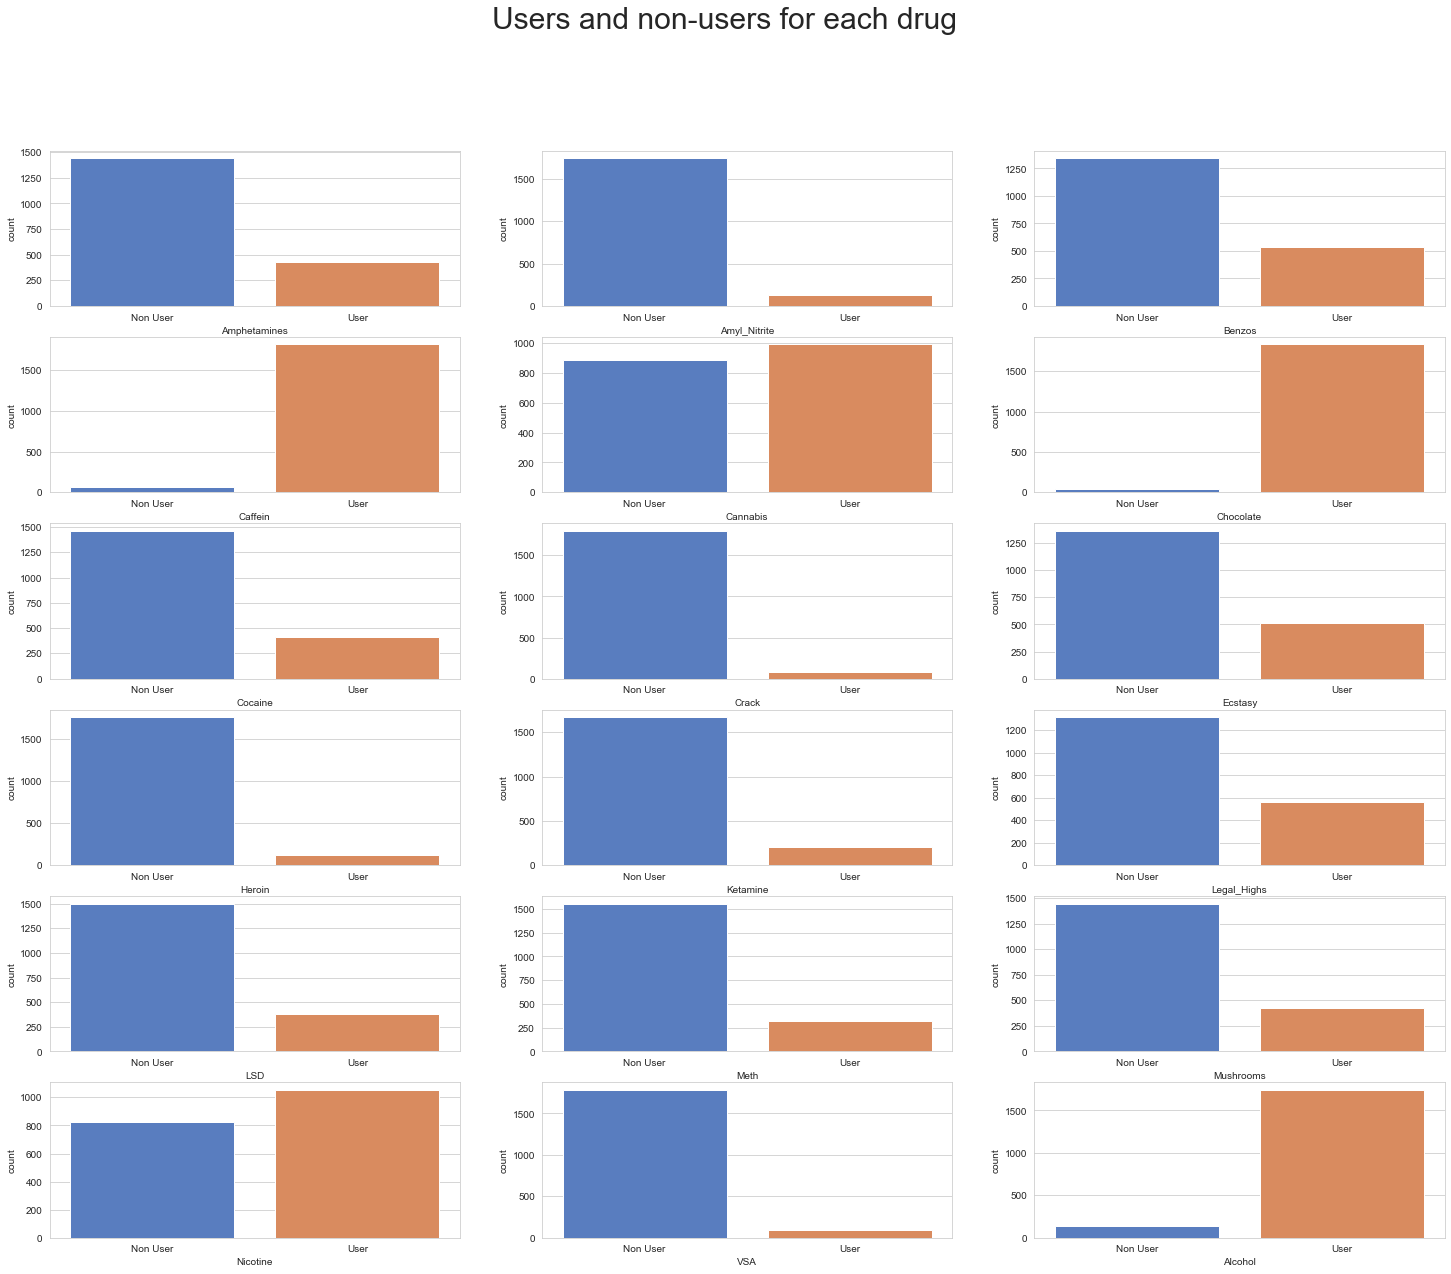

In [14]:
# Plotting Use vs. Non-use for each drug
# Ergänzen: Titel etc
fig, ax = plt.subplots(ncols=3, nrows=6, figsize=(25,20))
plt.suptitle("Users and non-users for each drug", fontsize = 30);


f1 = sns.countplot(x='Amphetamines', data=drugs, ax=ax[0,0]);
f1.set_xticks(range(0, 2));
f1.set_xticklabels(["Non User", "User"]);
#f1.set_title("Amphetamines", fontsize = 15);

f2 = sns.countplot(x='Amyl_Nitrite', data=drugs, ax=ax[0,1]);
f2.set_xticks(range(0, 2));
f2.set_xticklabels(["Non User", "User"]);
#f2.set_title("Amyl_Nitrite", fontsize = 15);

f3 = sns.countplot(x='Benzos', data=drugs, ax=ax[0,2]);
f3.set_xticks(range(0, 2));
f3.set_xticklabels(["Non User", "User"]);
#f3.set_title("Benzos", fontsize = 15);

f4 = sns.countplot(x='Caffein', data=drugs, ax=ax[1,0]);
f4.set_xticks(range(0, 2))
f4.set_xticklabels(["Non User", "User"]);
#f4.set_title("Caffein", fontsize = 15);

f5 = sns.countplot(x='Cannabis', data=drugs, ax=ax[1,1])
f5.set_xticks(range(0, 2));
f5.set_xticklabels(["Non User", "User"]);
#f5.set_title("Cannabis", fontsize = 15);

f6 = sns.countplot(x='Chocolate', data=drugs, ax=ax[1,2]);
f6.set_xticks(range(0, 2));
f6.set_xticklabels(["Non User", "User"]);
#f6.set_title("Chocolate", fontsize = 15);

f7 = sns.countplot(x='Cocaine', data=drugs, ax=ax[2,0]);
f7.set_xticks(range(0, 2));
f7.set_xticklabels(["Non User", "User"]);
#f7.set_title("Cocaine", fontsize = 15);

f8 = sns.countplot(x='Crack', data=drugs, ax=ax[2,1]);
f8.set_xticks(range(0, 2));
f8.set_xticklabels(["Non User", "User"]);
#f8.set_title("Crack", fontsize = 15);

f9 = sns.countplot(x='Ecstasy', data=drugs, ax=ax[2,2]);
f9.set_xticks(range(0, 2));
f9.set_xticklabels(["Non User", "User"]);
#f9.set_title("Ecstasy", fontsize = 15);

f10 = sns.countplot(x='Heroin', data=drugs, ax=ax[3,0]);
f10.set_xticks(range(0, 2));
f10.set_xticklabels(["Non User", "User"]);
#f10.set_title("Heroin", fontsize = 15);

f11 = sns.countplot(x='Ketamine', data=drugs, ax=ax[3,1])
f11.set_xticks(range(0, 2));
f11.set_xticklabels(["Non User", "User"]);
#f11.set_title("Ketamine", fontsize = 15);

f12 = sns.countplot(x='Legal_Highs', data=drugs, ax=ax[3,2]);
f12.set_xticks(range(0, 2));
f12.set_xticklabels(["Non User", "User"]);
#f12.set_title("Legal_Highs", fontsize = 15);

f13 = sns.countplot(x='LSD', data=drugs, ax=ax[4,0]);
f13.set_xticks(range(0, 2));
f13.set_xticklabels(["Non User", "User"]);
#f13.set_title("LSD", fontsize = 15);

f14 = sns.countplot(x='Meth', data=drugs, ax=ax[4,1]);
f14.set_xticks(range(0, 2));
f14.set_xticklabels(["Non User", "User"]);
#f14.set_title("Meth", fontsize = 15);

f15 = sns.countplot(x='Mushrooms', data=drugs, ax=ax[4,2]);
f15.set_xticks(range(0, 2));
f15.set_xticklabels(["Non User", "User"]);
#f15.set_title("Mushrooms", fontsize = 15);

f16 = sns.countplot(x='Nicotine', data=drugs, ax=ax[5,0]);
f16.set_xticks(range(0, 2));
f16.set_xticklabels(["Non User", "User"]);
#f16.set_title("Nicotine", fontsize = 15);

f17 = sns.countplot(x='VSA', data=drugs, ax=ax[5,1]);
f17.set_xticks(range(0, 2));
f17.set_xticklabels(["Non User", "User"]);
#f17.set_title("VSA", fontsize = 15);

f18 = sns.countplot(x='Alcohol', data=drugs, ax=ax[5,2]);
f18.set_xticks(range(0, 2));
f18.set_xticklabels(["Non User", "User"]);
#f18.set_title("Alcohol", fontsize = 15);

**Findings:** ```Alcohol```, ```Nicotine```, ```Caffeine```, ```Cannabis``` and ```Chocolate``` are the substances, which have more users than non-users.

**Combining different drugs into one column** <br/>
We combined all illegal drugs into one column in order to analyse the global substance abuse.<br/>
We also combined the legal drugs ```Alcohol```and ```Nicotine``` in one column for checking differences in legal and illegal drugs.<br/>
```Chocolate```and ```Caffein```were excluded from our analyses, since our main focus was to analyse risk factors for later illegal drug abuse.

In [15]:
drugs = drugs.drop("Chocolate", axis=1)
drugs = drugs.drop("Caffein", axis=1)

In [16]:
# Creating legal drug column
legal_drug = []

for alc, nic in zip(drugs["Alcohol"].tolist(), drugs["Nicotine"].tolist()):
    if alc == 1 or nic == 1:
        legal_drug.append(1)
    else:
        legal_drug.append(0)

In [17]:
drugs["legal_drugs"] = legal_drug

In [18]:
# Creating illegal drug column
illlegal_drug = []

In [19]:
df_temp = drugs

df_temp = df_temp.drop("Alcohol", axis=1)

df_temp = df_temp.drop("Nicotine", axis=1)

**Drop legal drugs**<br/>
We decided to drop the legal drugs, because our project focuses on the illegal drugs and because the target value would be highly imbalanced due to the fact, that most of the people consume legal drugs regularly.

In [20]:
df_temp = df_temp.drop("legal_drugs", axis=1)

In [21]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1884
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1877 non-null   int64  
 1   Age                1877 non-null   float64
 2   Gender             1877 non-null   float64
 3   Education          1877 non-null   float64
 4   Country            1877 non-null   float64
 5   Ethnicity          1877 non-null   float64
 6   Neuroticism        1877 non-null   float64
 7   Extraversion       1877 non-null   float64
 8   Openness           1877 non-null   float64
 9   Agreeableness      1877 non-null   float64
 10  Conscientiousness  1877 non-null   float64
 11  Impulsiveness      1877 non-null   float64
 12  Sensation_Seeking  1877 non-null   float64
 13  Amphetamines       1877 non-null   int64  
 14  Amyl_Nitrite       1877 non-null   int64  
 15  Benzos             1877 non-null   int64  
 16  Cannabis           1877 

**Illegal drugs**<br/>
We defined illegal drug abuse as having used any of the illegal substances (e.g. sum of used substances is greater than 0) and added them to the original dataframe

In [22]:
df_temp["illegal_drugs"] = df_temp.iloc[:, 13:].sum(axis=1)

In [23]:
df_temp["illegal_drugs"] = df_temp["illegal_drugs"].apply(lambda x: 0 if x<1 else 1)

In [24]:
drugs = pd.concat([df_temp["illegal_drugs"], drugs], axis=1)

**Correlations between drugs**

In [25]:
drugs_only = drugs.iloc[:, 14:30]

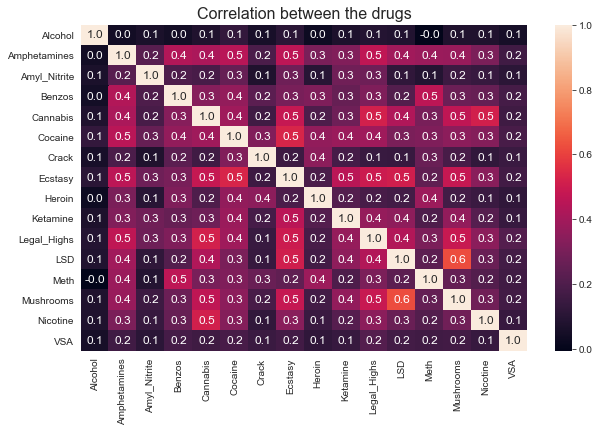

In [26]:
plt.subplots(figsize=(10,6))
sns.heatmap(drugs_only.corr(),annot=True,fmt="1.1f", annot_kws={"size": 12})
plt.title("Correlation between the drugs",fontsize=16)
plt.show()

**Correlations**<br/>
It can be concluded, that ```Alcohol``` has the lowest correlations to other substances.<br/> ```Cannabis``` and ```Ecstasy``` have the most correlations to other drugs.<br/> The highest correlation of 0.6 can be found between ```Mushrooms``` and ```LSD```. 

**User vs. non user**

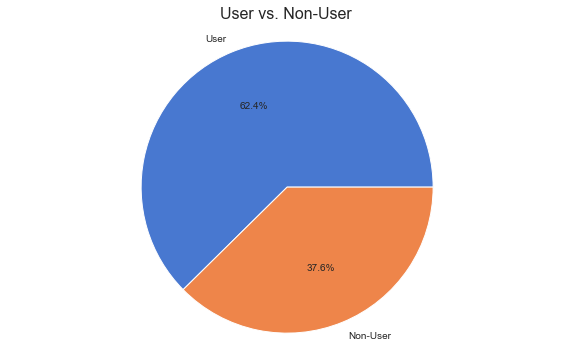

In [93]:
plt.figure(figsize=(10,6))
plt.pie(drugs.illegal_drugs.value_counts(),labels=["User", "Non-User"], autopct='%1.1f%%')
plt.axis('equal')
plt.title("User vs. Non-User", fontsize=16)
plt.show()

In [95]:
drugs["illegal_drugs"].value_counts()

1    1171
0     706
Name: illegal_drugs, dtype: int64

## 3.2 Demographic Data

The columns of our interest among demographic data are ```age```, ```gender``` and ```education```.


In [27]:
demographic_columns = [
    'Age', 
    'Gender', 
    'Education',
]

To justify our procedure to only account for the UK values, we first have a look at drug abuse in the different countries.

### Country variable

In [28]:
country = ['USA' if c < -0.5 else 
           'New Zealand' if c > -0.5 and c < -0.4 else 
           'Other' if c > -0.4 and c < -0.2 else 
           'Australia' if c > -0.2 and c < 0 else 
           'Ireland' if c > 0 and c < 0.23 else 
           'Canada' if c > 0.23 and c < 0.9 else 
           'UK' 
           for c in drugs['Country']]

In [29]:
drugs['Country'] = country

In [30]:
drugs.Country.value_counts()

UK             1044
USA             551
Other           118
Canada           87
Australia        52
Ireland          20
New Zealand       5
Name: Country, dtype: int64

**Seperate the data into different countries**<br/>

In [31]:
drugs_uk = drugs.query("Country == 'UK'")
usa_drugs = drugs.query("Country == 'USA'")
other_drugs = drugs.query("Country == 'Other'")
canada_drugs = drugs.query("Country == 'Canada'")
aussie_drugs = drugs.query("Country == 'Australia'")
ireland_drugs = drugs.query("Country == 'Ireland'")
nz_drugs = drugs.query("Country == 'New Zealand'")

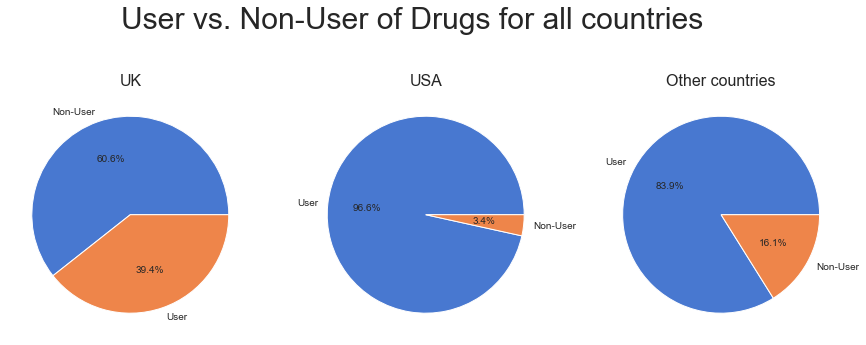

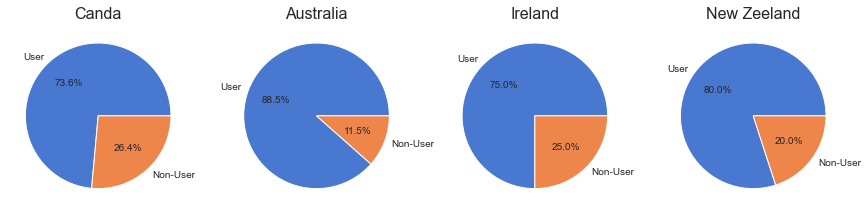

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

plt.suptitle("User vs. Non-User of Drugs for all countries", fontsize = 30, y=1.08);
ax1.pie(drugs_uk.illegal_drugs.value_counts(),labels=["Non-User", "User"], autopct='%1.1f%%')
ax1.set_title("UK", fontsize=16)

ax2.pie(usa_drugs.illegal_drugs.value_counts(),labels=["User", "Non-User"], autopct='%1.1f%%')
ax2.set_title("USA",fontsize=16);

ax3.pie(other_drugs.illegal_drugs.value_counts(),labels=["User", "Non-User"], autopct='%1.1f%%')
ax3.set_title("Other countries",fontsize=16);

fig2, (ax4, ax5, ax6, ax7) = plt.subplots(1, 4, figsize=(15,5))

ax4.pie(canada_drugs.illegal_drugs.value_counts(),labels=["User", "Non-User"], autopct='%1.1f%%')
ax4.set_title("Canda",fontsize=16);

ax5.pie(aussie_drugs.illegal_drugs.value_counts(),labels=["User", "Non-User"], autopct='%1.1f%%')
ax5.set_title("Australia",fontsize=16);

ax6.pie(ireland_drugs.illegal_drugs.value_counts(),labels=["User", "Non-User"], autopct='%1.1f%%')
ax6.set_title("Ireland",fontsize=16);

ax7.pie(nz_drugs.illegal_drugs.value_counts(),labels=["User", "Non-User"], autopct='%1.1f%%')
ax7.set_title("New Zeeland",fontsize=16);

**Findings**<br/>
Balance of drug abuse seems to vary between different countries. Since for some countries the dataset has not enough data, we will not include country as feature in our model.


### Age

Restrucuring the data

In [33]:
warnings.filterwarnings('ignore')

age = ['18-24' if a <= -0.9 else 
       '25-34' if a >= -0.5 and a < 0 else 
       '35-44' if a > 0 and a < 1 else 
       '45-54' if a > 1 and a < 1.5 else 
       '55-64' if a > 1.5 and a < 2 else 
       '65+' 
       for a in drugs['Age']]

drugs["Age"] = age

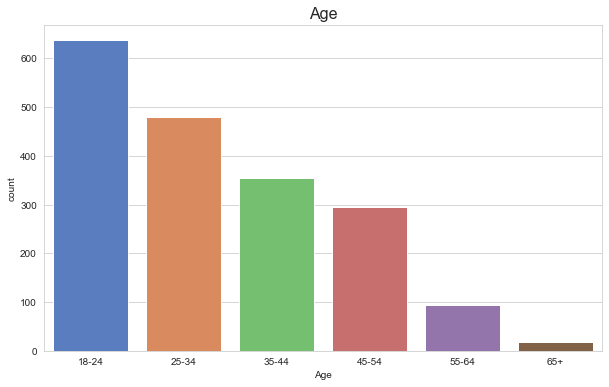

In [108]:
plt.figure(figsize=(10,6))
plt.title("Age", fontsize=16);
sns.countplot(x='Age', data=drugs.sort_values("Age"));

***Findings***<br/> In the dataset, most of the data comes from the ```18-24```group.

### Gender

Restructuring the data

In [64]:
gender = ['Female' if g > 0 else "Male" for g in drugs['Gender']]
drugs["Gender"] = gender

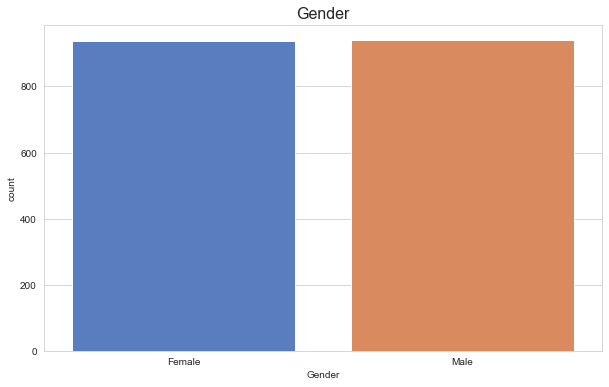

In [110]:
plt.figure(figsize=(10,6))
plt.title("Gender", fontsize=16);
sns.countplot(x='Gender', data=drugs);

***Findings***<br/> Regarding gender, the dataset is almost balanced.

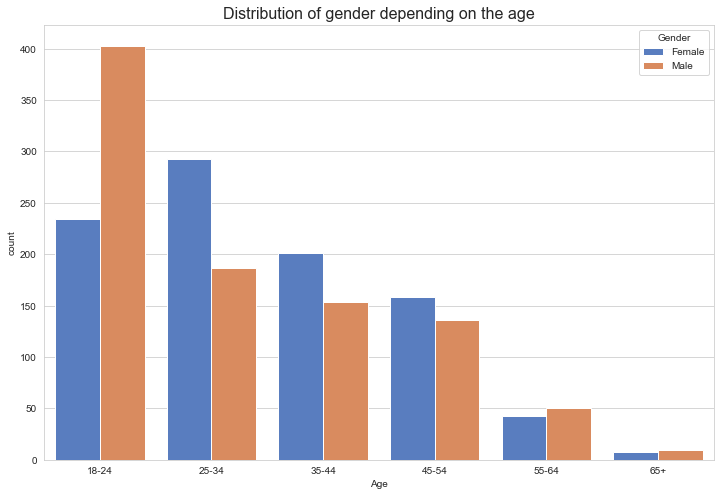

In [94]:
plt.figure(figsize = (12,8))
plt.title("Distribution of gender depending on the age", fontsize=16)
sns.countplot(x='Age', hue='Gender', data=drugs.sort_values(by=['Age']));

### Education

Restructuring the data

In [67]:
education = ['Left school before 16 years' if e <-2 else 
             'Left school at 16 years' if e > -2 and e < -1.5 else 
             'Left school at 17 years' if e > -1.5 and e < -1.4 else 
             'Left school at 18 years' if e > -1.4 and e < -1 else 
             'Some college or university, no certificate or degree' if e > -1 and e < -0.5 else 
             'Professional certificate/ diploma' if e > -0.5 and e < 0 else 
             'University degree' if e > 0 and e < 0.5 else 
             'Masters degree' if e > 0.5 and e < 1.5 else 
             'Doctorate degree' 
             for e in drugs['Education']]

drugs["Education"] = education

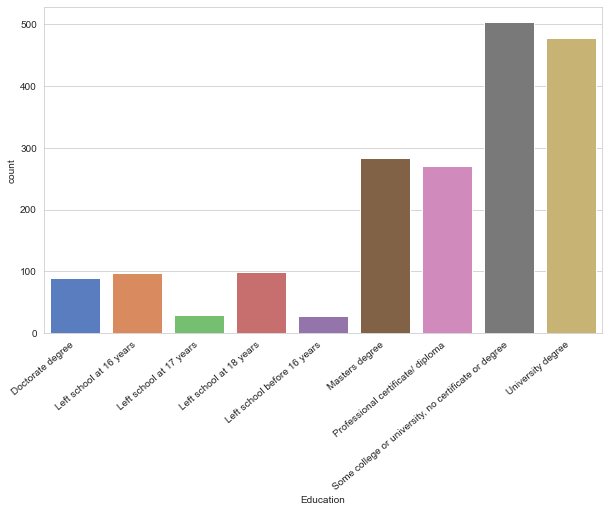

In [68]:
plt.figure(figsize=(10,6))
edu_plot = sns.countplot(x='Education', data=drugs.sort_values(by=['Education']));
edu_plot.set_xticklabels(edu_plot.get_xticklabels(), rotation=40, ha="right");

**Findings**<br/>
The most commom educational backgrounds in this dataset is```some college or university, no certificate or degree```, followed by```university degree``` and ```masters degree```. <br/> Thus, most of the people in this dataset are highly educated.

## 3.3 Personality Data

In [40]:
personality_columns = [
    'Neuroticism',
    'Extraversion',
    'Openness',
    'Agreeableness',
    'Conscientiousness',
    'Impulsiveness',
    'Sensation_Seeking'
]

Create **personality dataframe**

In [69]:
df_personality = drugs[['Neuroticism','Extraversion','Openness','Agreeableness',
                      'Conscientiousness','Impulsiveness','Sensation_Seeking']]

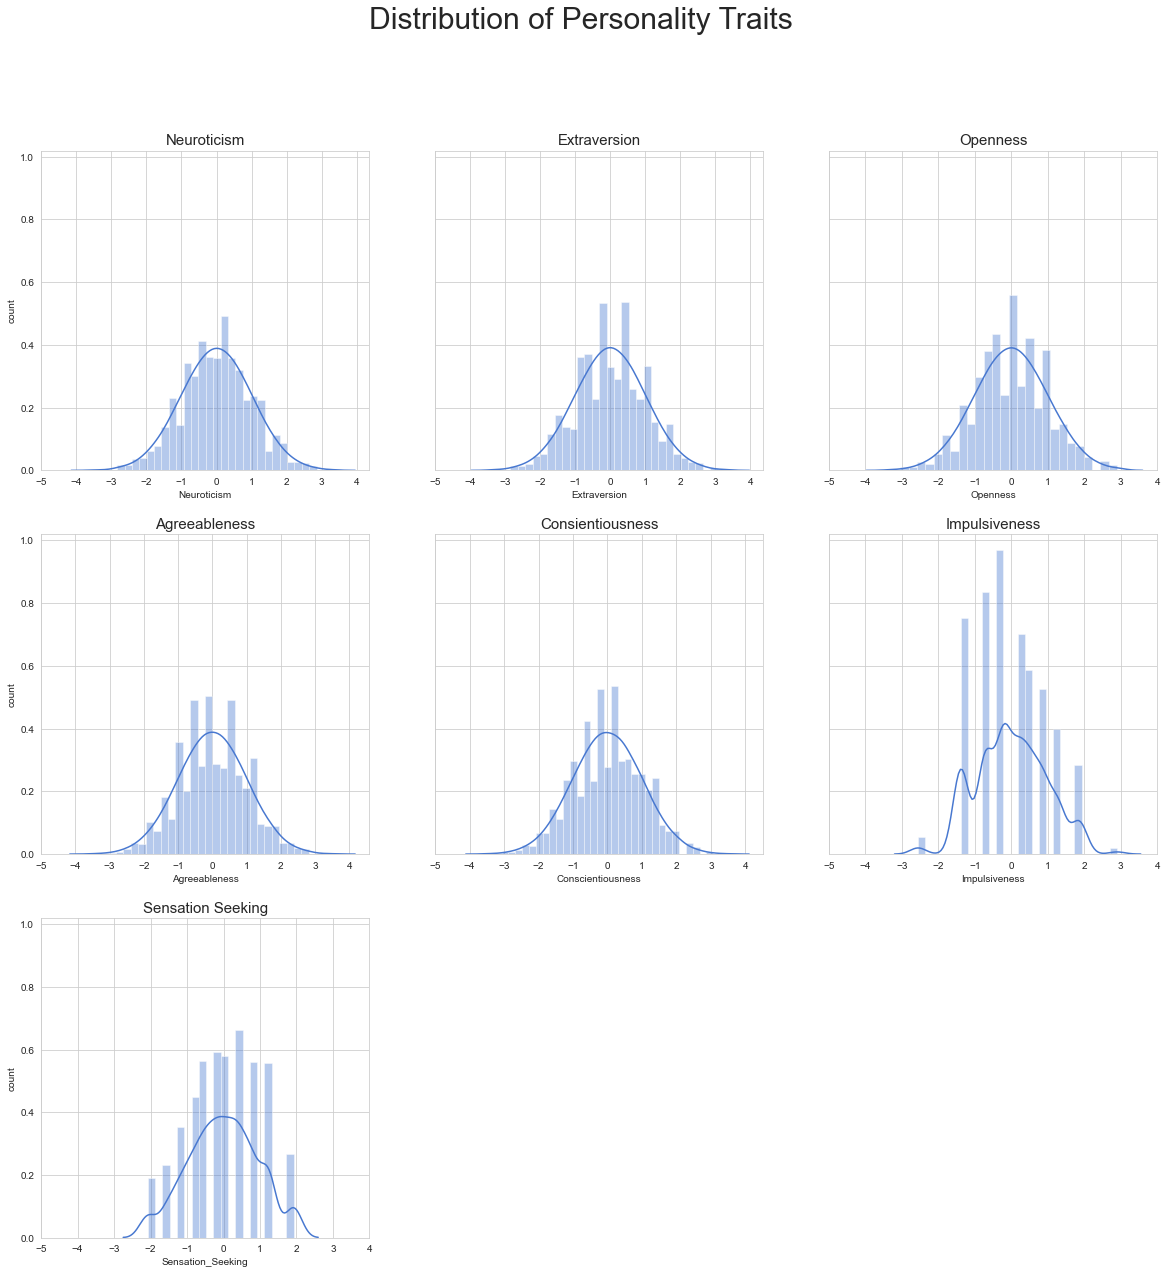

In [70]:
fig, ax = plt.subplots(ncols=3, nrows=3,sharex=False,sharey=True, figsize=(20,20))
plt.suptitle("Distribution of Personality Traits", fontsize = 30)

f1 = sns.distplot(drugs.Neuroticism, ax=ax[0,0]);
f1.set_xticks(range(-5, 5));
f1.set_title("Neuroticism", fontsize = 15);
f1.set_ylabel("count");

f2 = sns.distplot(drugs.Extraversion, ax=ax[0,1]);
f2.set_title("Extraversion", fontsize = 15);
f2.set_xticks(range(-5, 5));
#f2.set_ylabel("count");

f3 = sns.distplot(drugs.Openness, ax=ax[0,2]);
f3.set_title("Openness", fontsize = 15);
f3.set_xticks(range(-5, 5));
#f3.set_ylabel("count");

f4 = sns.distplot(drugs.Agreeableness, ax=ax[1,0]);
f4.set_title("Agreeableness", fontsize = 15);
f4.set_xticks(range(-5, 5));
f4.set_ylabel("count");

f5 = sns.distplot(drugs.Conscientiousness, ax=ax[1,1]);
f5.set_title("Consientiousness", fontsize = 15);
f5.set_xticks(range(-5, 5));
#f5.set_ylabel("count");

f6 = sns.distplot(drugs.Impulsiveness,ax=ax[1,2]);
f6.set_title("Impulsiveness", fontsize = 15);
f6.set_xticks(range(-5, 5));
#f6.set_ylabel("count");

f7 = sns.distplot(drugs.Sensation_Seeking, ax=ax[2,0]);
f7.set_title("Sensation Seeking", fontsize = 15);
f7.set_xticks(range(-5, 5));
f7.set_ylabel("count");

fig.delaxes(ax[2][1]);
fig.delaxes(ax[2][2]);

**Findings**<br/>
At first glance, personality traits seem to be normally distributed.

For a better understanding, we can calculate the **skew** of the personality traits

In [71]:
# Calculacte skew
rows_skew = [[trait, skew(df_personality[trait])] for trait in df_personality]
df_skew = pd.DataFrame(rows_skew, columns=["Trait", "Skew"])
df_skew

,Trait,Skew
0,Neuroticism,-0.003104
1,Extraversion,-0.000808
2,Openness,-0.008422
3,Agreeableness,-0.005468
4,Conscientiousness,-0.004424
5,Impulsiveness,0.077104
6,Sensation_Seeking,-0.042360


**Findings**<br/>
Skew-Values are close to zero, which means the traits are close to normally distributed

**Checking for intercorrelations**

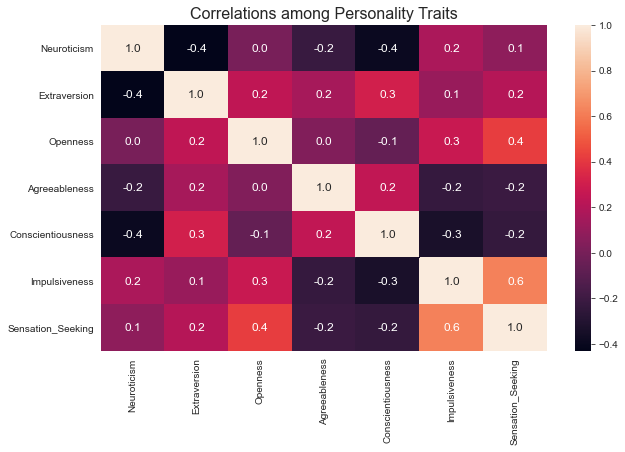

In [74]:
plt.figure(figsize=(10,6))
sns.heatmap(df_personality.corr(), annot=True, annot_kws={"size": 12}, fmt="1.1f");
plt.title("Correlations among Personality Traits", fontsize=16);

**Findings**<br/>
The highest correlation of 0.6 can be found between ```Sensation Seeking and Impulsiveness```.

**Personality traits and age**

In the following, we will have a look at the occurence of the personality traits per age group.

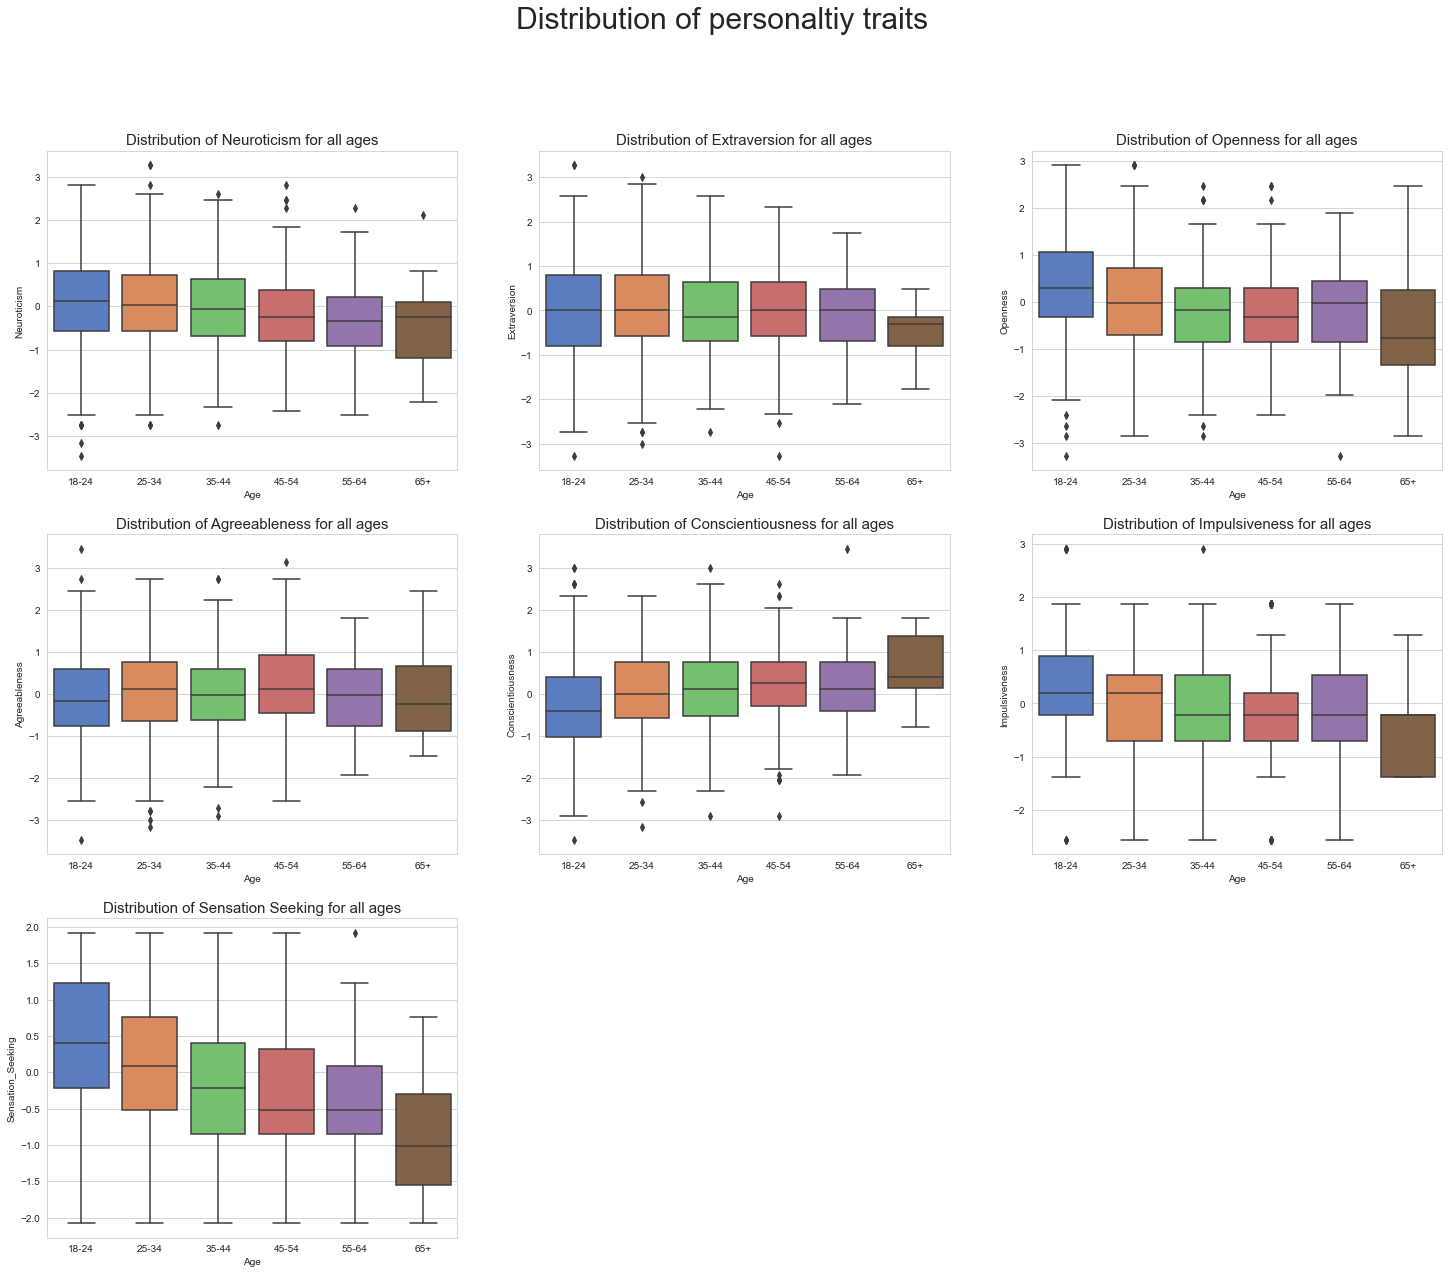

In [75]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(25,20))
plt.suptitle("Distribution of personaltiy traits", fontsize = 30);


f1 = sns.boxplot(x='Age', y='Neuroticism', data=drugs.sort_values("Age"), ax=ax[0,0]);
f1.set_title("Distribution of Neuroticism for all ages", fontsize = 15);


f2 = sns.boxplot(x='Age', y='Extraversion', data=drugs.sort_values("Age"), ax=ax[0,1]);
f2.set_title("Distribution of Extraversion for all ages", fontsize = 15);

f3 = sns.boxplot(x='Age', y='Openness', data=drugs.sort_values("Age"), ax=ax[0,2]);
f3.set_title("Distribution of Openness for all ages", fontsize = 15);

f4 = sns.boxplot(x='Age', y='Agreeableness', data=drugs.sort_values("Age"), ax=ax[1,0]);
f4.set_title("Distribution of Agreeableness for all ages", fontsize = 15);

f5 = sns.boxplot(x='Age', y='Conscientiousness', data=drugs.sort_values("Age"), ax=ax[1,1]);
f5.set_title("Distribution of Conscientiousness for all ages", fontsize = 15);

f6 = sns.boxplot(x='Age', y='Impulsiveness', data=drugs.sort_values("Age"), ax=ax[1,2]);
f6.set_title("Distribution of Impulsiveness for all ages", fontsize = 15);

f7 = sns.boxplot(x='Age', y='Sensation_Seeking', data=drugs.sort_values("Age"), ax=ax[2,0]);
f7.set_title("Distribution of Sensation Seeking for all ages", fontsize = 15);

fig.delaxes(ax[2][1]);
fig.delaxes(ax[2][2]);

***Findings:*** Especially for ```Impulsivness```, ```Openness``` and ```Sensation Seeking``` of the ```65+``` group, high differences were found to the other age groups. This will have implications to our use case and the modelling. A possibility could be, to remove the ```65+``` group due to high differences to the other age groups. There are only 12 persons in this group.

# 4 First approach for checking assumptions

## Assumptions 1 and 2: Personality&Drugs

In [76]:
# Check correlations between personality traits and drug use
# First, create df with only personality traits and drug use
df_perso_drug = pd.concat([drugs["illegal_drugs"], df_personality], axis=1)

In [77]:
df_perso_drug.shape

(1877, 8)

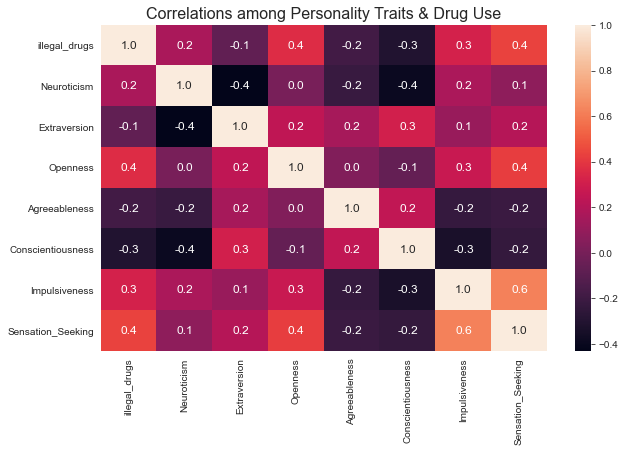

In [78]:
plt.figure(figsize = (10,6))
sns.heatmap(df_perso_drug.corr(), annot=True, annot_kws={"size": 12}, fmt="1.1f");
plt.title("Correlations among Personality Traits & Drug Use", fontsize=16);

In [79]:
traits = []
corr = []
p = []

for trait in df_personality:
    #print(trait)
    traits.append(trait)
    corr.append(round(stats.pearsonr(df_personality[trait], drugs["illegal_drugs"])[0], 3))
    p.append(round(stats.pearsonr(df_personality[trait], drugs["illegal_drugs"])[1], 3))
    
frame = pd.DataFrame(data={'Trait':traits,'corr':corr,'p':p})
frame

,Trait,corr,p
0,Neuroticism,0.172,0.000
1,Extraversion,-0.072,0.002
2,Openness,0.363,0.000
3,Agreeableness,-0.182,0.000
4,Conscientiousness,-0.305,0.000
5,Impulsiveness,0.319,0.000
6,Sensation_Seeking,0.437,0.000


**Assumption 1:** As expected, we see different personality traits to be correlated with drug abuse.

For illegal drug abuse, ```Impulsiveness```, ```Openness to Experience``` and ```Sensation Seeking``` have low, but noteworthy  positive correlations with drug abuse. ```Conscientiousness```has a low, but noteworthy negative correlation to drug abuse.



**Assumption 2:** As expected, ```Sensation Seeking``` has the highest correlation with illegal drug abuse. 

## Assumptions 3 & 4: Education Level & Drugs

### Assumption 3: Is education a protection factor?

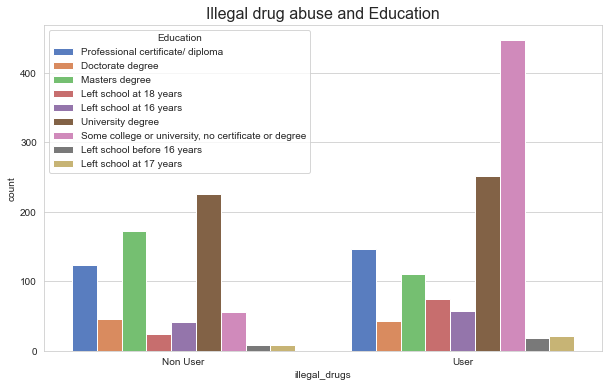

In [80]:
warnings.filterwarnings('ignore')


plt.figure(figsize = (10,6))
f1 = sns.countplot(drugs.illegal_drugs, hue=drugs["Education"]);
f1.set_title("Illegal drug abuse and Education", fontsize=16);
f1.set_xticklabels(["Non User", "User"]);

***Findings:*** Regarding educational level, the groups, which use *illegal drugs* the most, are the group of ```people who went to some college or university, no certificate or degree```. They are followed by ```people with a university degree```and ```people with a professional diploma```.

**Assumption 3:** Thus, opposite to our assumption, a higher education does not go along with lower illegal drug abuse.

### Assumption 4: Do substances abused differ in dependence of educational background?

**Top Five Drugs (Legal&Illegal)**

In [81]:
top_5_drugs_general = drugs.iloc[:, 13:29].sum().sort_values()[::-1][:6]
print(top_5_drugs_general)

Alcohol        1742.0
Nicotine       1053.0
Cannabis        991.0
Legal_Highs     561.0
Benzos          532.0
Ecstasy         513.0
dtype: float64


***Findings***: These are the drugs (legal and illegal), which are consumed most often within the countries examined.

**Top Five Illegal Drugs**

In [82]:
df_illegaldrugs = drugs
df_illegaldrugs = drugs.drop(["Alcohol","Nicotine"], axis=1)
#df_illegaldrugs.info()

In [83]:
top_5_drugs_illegal = df_illegaldrugs.iloc[:, 14:28].sum().sort_values()[::-1][:6]
print(top_5_drugs_illegal)

Cannabis        991
Legal_Highs     561
Benzos          532
Ecstasy         513
Amphetamines    433
Mushrooms       428
dtype: int64


***Findings***: These are the illegal drugs, which are consumed most often within the countries examined.

In [96]:
#Splitting illegal drug user by higher and lower education level
high_edu = drugs.query("Education == 'University degree' \
                            or Education == 'Masters degree' \
                            or Education == 'Professional certificate/ diploma'\
                            or Education == 'Doctorate degree'\
                            or Education == 'Some college or university, no certificate or degree'")

drugs_high_edu = high_edu.query("illegal_drugs != 0")
drugs_high_edu = drugs_high_edu.drop(["Alcohol", "Nicotine"] , axis=1)
#drugs_high_edu.info()

In [97]:
#Splitting illegal drug user by higher and lower education level
low_edu = drugs.query("Education != 'University degree' \
                            and Education != 'Masters degree' \
                            and Education != 'Professional certificate/ diploma'\
                            and Education != 'Doctorate degree'\
                            and Education != 'Some college or university, no certificate or degree'")

drugs_low_edu = low_edu.query("illegal_drugs != 0")
drugs_low_edu = drugs_low_edu.drop(["Alcohol", "Nicotine"] , axis=1)
#drugs_low_edu.info()

Finding the top 5 illegal drugs for both groups

In [98]:
top_5_drugs_high_edu = drugs_high_edu.iloc[:, 14:28].sum().sort_values()[::-1][:6]
top_5_drugs_low_edu = drugs_low_edu.iloc[:, 14:28].sum().sort_values()[::-1][:6]

print("Higher education:\n",top_5_drugs_high_edu)
print()
print("Lower education\n",top_5_drugs_low_edu)

Higher education:
 Cannabis        843
Legal_Highs     481
Benzos          447
Ecstasy         443
Mushrooms       373
Amphetamines    369
dtype: int64

Lower education
 Cannabis        148
Benzos           85
Legal_Highs      80
Ecstasy          70
Amphetamines     64
Meth             59
dtype: int64


**Plotting the differences in illegal drug abuse by educational background**

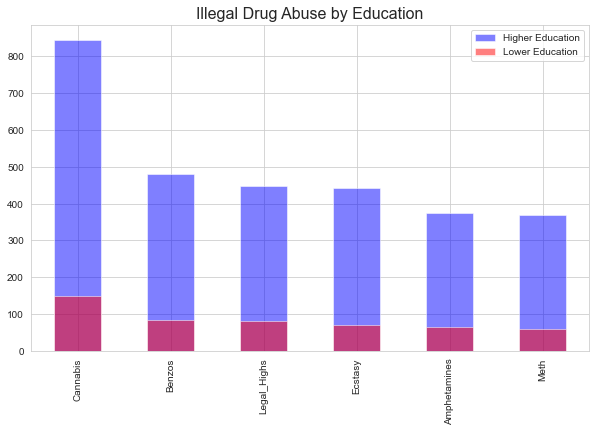

In [99]:
plt.figure(figsize = (10,6))
plt.title("Illegal Drug Abuse by Education", fontsize = 16)
f1 = drugs_high_edu.iloc[:, 14:28].sum().sort_values()[::-1][:6].plot(kind="bar", color="blue", alpha=0.5);
f2 = drugs_low_edu.iloc[:, 14:28].sum().sort_values()[::-1][:6].plot(kind="bar", color="red", alpha=0.5);
plt.legend(["Higher Education", "Lower Education"]);

**Assumption 4:** The top 5 illegal drugs do not differ between higher and lower educational background, except for Mushrooms (for the higher educated) and Meth (for the lower educated group). The order is slightly different.

For both groups, ```Cannabis``` is the most often used drug, followed by```Benzos``` and ```Legal_Highs```(lower education) or ```Legal_Highs``` and ```Benzos```. ```Ecstacy```is on fourth rank for both groups. 

Opposite our expectation, there are no big differences in the kind of substances abused due to educational background.

## Assumption 5: Personality, Gender and Drug Use

### Personality and Gender

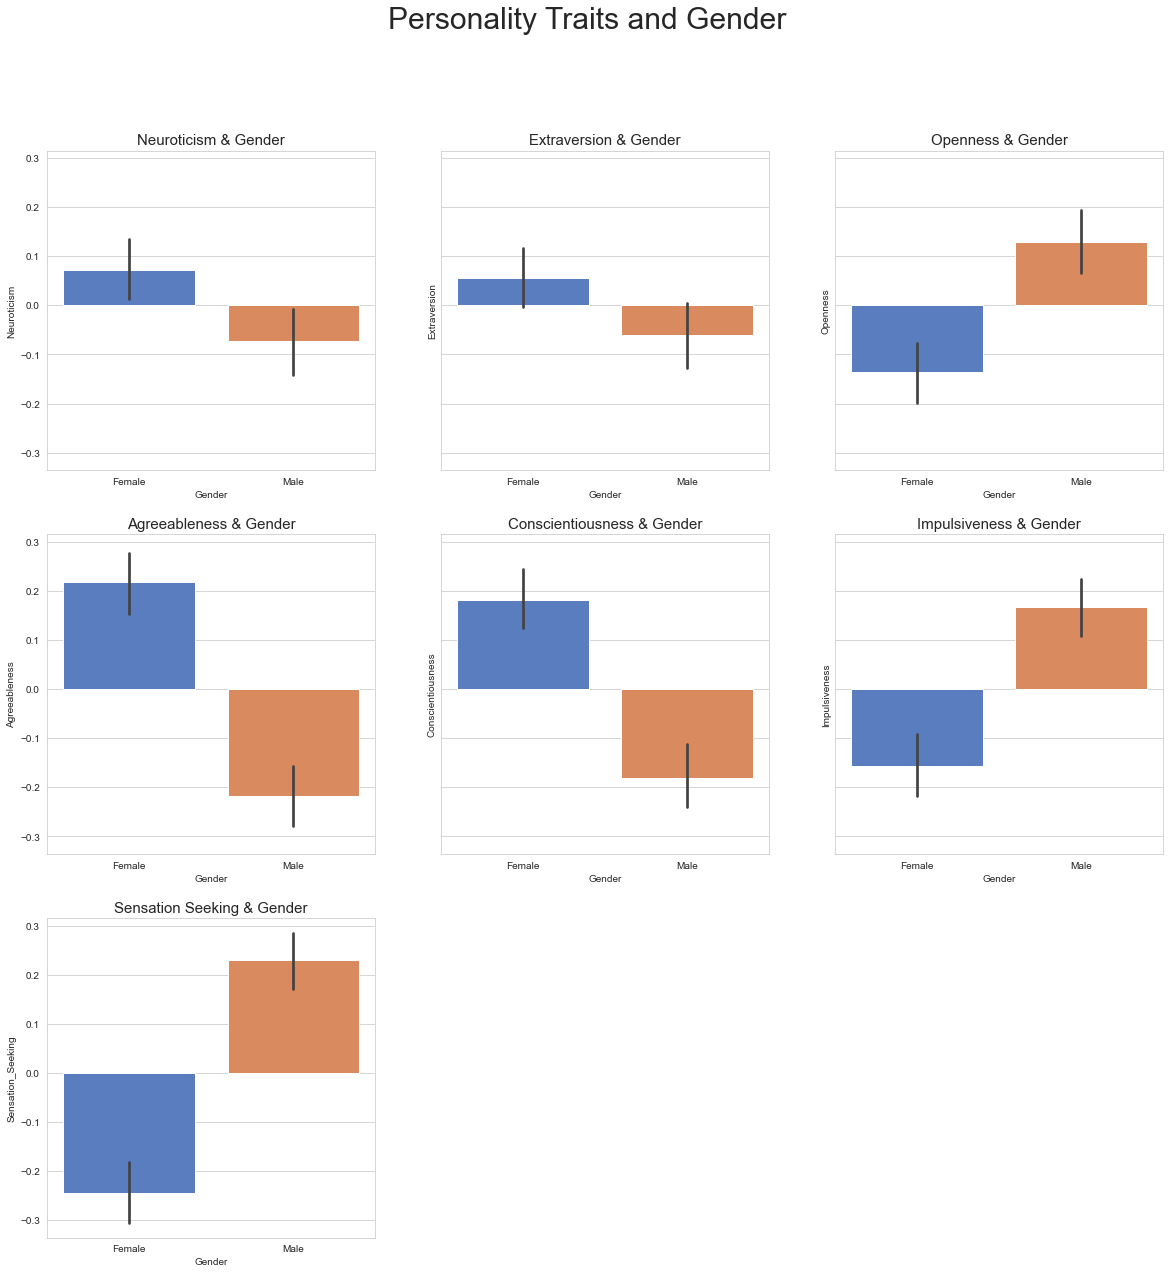

In [101]:
fig, ax = plt.subplots(ncols=3, nrows=3,sharex=False,sharey=True, figsize=(20,20))
plt.suptitle("Personality Traits and Gender", fontsize = 30);

f1 = sns.barplot(y=drugs.Neuroticism, x=drugs.Gender, ax=ax[0,0]);
#f1.set_xticks(range(-5, 5));
f1.set_title("Neuroticism & Gender", fontsize = 15);
#f1.set_ylabel("count");

f2 = sns.barplot(y=drugs.Extraversion,x=drugs.Gender, ax=ax[0,1]);
f2.set_title("Extraversion & Gender", fontsize = 15);
#f2.set_xticks(range(-5, 5));
#f2.set_ylabel("count");

f3 = sns.barplot(y=drugs.Openness, x=drugs.Gender, ax=ax[0,2]);
f3.set_title("Openness & Gender", fontsize = 15);
#f3.set_xticks(range(-5, 5));
#f3.set_ylabel("count");

f4 = sns.barplot(y=drugs.Agreeableness,x=drugs.Gender, ax=ax[1,0]);
f4.set_title("Agreeableness & Gender", fontsize = 15);
#f4.set_xticks(range(-5, 5));
#f4.set_ylabel("count");

f5 = sns.barplot(y=drugs.Conscientiousness,x=drugs.Gender, ax=ax[1,1]);
f5.set_title("Conscientiousness & Gender", fontsize = 15);
#f5.set_xticks(range(-5, 5));
#f5.set_ylabel("count");

f6 = sns.barplot(y=drugs.Impulsiveness,x=drugs.Gender, ax=ax[1,2]);
f6.set_title("Impulsiveness & Gender", fontsize = 15);
#f6.set_xticks(range(-5, 5));
#f6.set_ylabel("count");

f7 = sns.barplot(y=drugs.Sensation_Seeking, x=drugs.Gender, ax=ax[2,0]);
f7.set_title("Sensation Seeking & Gender", fontsize = 15);
#f7.set_xticks(range(-5, 5));
#f7.set_ylabel("count");

fig.delaxes(ax[2][1]);
fig.delaxes(ax[2][2]);

As a result, we see clear gender differences in certain personality traits.

Thinking back to the personality traits correlated the most with illegal drug abuse, we found
```Impulsiveness```, ```Openness to Experience``` and ```Sensation Seeking``` to have low, but noteworthy  positive correlations. ```Conscientiousness```has a low, but noteworthy negative correlation to drug abuse.<br/>

Within those personality traits, we see gender differences.
```Impulsiveness```, ```Openness to Experience``` and ```Sensation Seeking``` is higher in men, whereas ```Conscientiousness``` is higher in women.


In [106]:
male = drugs.query('Gender == "Male"')
female = drugs.query('Gender == "Female"')
trait_list = ["Impulsiveness", "Openness", "Sensation_Seeking", "Conscientiousness"]

t = []
p = []

for trait in trait_list:
    t.append(round(stats.ttest_ind(male[trait], female[trait])[0], 3))
    p.append(round(stats.ttest_ind(male[trait], female[trait])[1], 4))
    
frame_t = pd.DataFrame(data={'Trait':trait_list,'t':t,'p':p})
frame_t


,Trait,t,p
0,Impulsiveness,7.448,0.0
1,Openness,5.847,0.0
2,Sensation_Seeking,11.010,0.0
3,Conscientiousness,-8.033,0.0


### Drug abuse and Gender

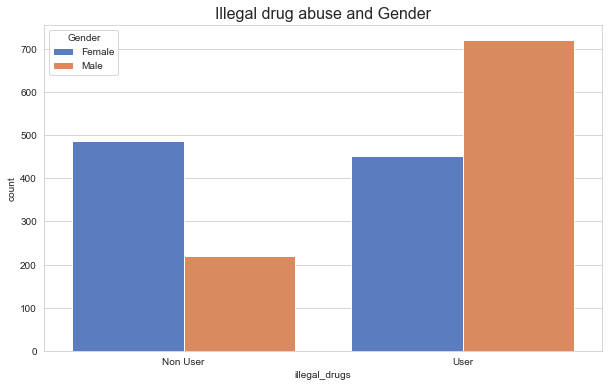

In [103]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (10,6))
f1 = sns.countplot(x='illegal_drugs', hue="Gender", data=drugs);
f1.set_title("Illegal drug abuse and Gender", fontsize=16);
f1.set_xticklabels(["Non User", "User"]);

Illegel Drug abuse is higher in men.

**Assumption 5:** Since ```Impulsiveness```, ```Openness to Experience``` and ```Sensation Seeking``` is higher in men and those traits are positive correlated to drug abuse, the higher illegal drug abuse among men potentially can be explained by gender differences in those traits. Furthermore, the higher expression of ```Conscientiousness``` in women and the negative correlation of ```Conscientiousness``` and illegal drug abuse can potentially explain the larger part of women within Non-user of illegal drugs.

In [104]:
male = drugs.query('Gender == "Male"')
female = drugs.query('Gender == "Female"')
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_ind(male["illegal_drugs"], female["illegal_drugs"]))

t-statistic = 13.309 pvalue = 0.0000


## Assumption 6: Drug abuse and Age

**Drug abuse per age class**

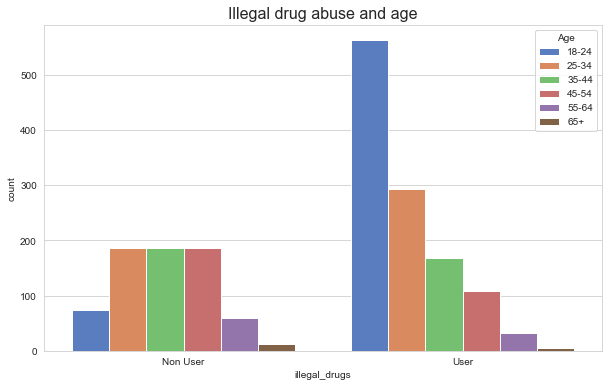

In [107]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,6))

f1 = sns.countplot(drugs["illegal_drugs"], hue=drugs["Age"].sort_values());
f1.set_title("Illegal drug abuse and age", fontsize=16);
f1.set_xticklabels(["Non User", "User"]);

**Assumption 6:** For illegal drug abuse,the following applies: The younger, the higher the illegal substance abuse within the examined age classes. 

